In [98]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [99]:
(xtr,ytr),(xte,yte)=mnist.load_data()

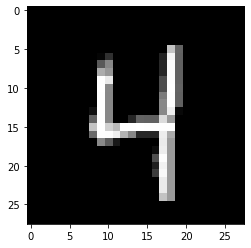

In [100]:
plt.imshow(xtr[92], cmap='gray')

In [101]:
ytr[92]

4

In [102]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],1).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],1).astype('float32')/255

In [103]:
xtr.shape
xte.shape

(10000, 28, 28, 1)

In [104]:
ytr=tcg(ytr)
yte=tcg(yte)

In [105]:
model = Sequential([
  Flatten(input_shape=(28, 28, 1)),
  Dense(784, activation='relu'),
  Dense(512, activation='relu'),
  Dense(392, activation='relu'),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(10, activation='softmax'),
])

In [106]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [107]:
x_train,x_valid = xtr[5000:],xtr[:5000]
y_train,y_valid = ytr[5000:],ytr[:5000]

In [108]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'best_model.h5',save_best_only = True,verbose=1)

history = model.fit(x_train,y_train,batch_size=256, epochs = 8,
          validation_data=(x_valid,y_valid),
          callbacks=[checkpoint],
          verbose=2, shuffle=True)

Train on 55000 samples, validate on 5000 samples
Epoch 1/8

Epoch 00001: val_loss improved from inf to 0.12323, saving model to best_model.h5
55000/55000 - 8s - loss: 0.4095 - accuracy: 0.8733 - val_loss: 0.1232 - val_accuracy: 0.9668
Epoch 2/8

Epoch 00002: val_loss improved from 0.12323 to 0.10783, saving model to best_model.h5
55000/55000 - 7s - loss: 0.1140 - accuracy: 0.9666 - val_loss: 0.1078 - val_accuracy: 0.9724
Epoch 3/8

Epoch 00003: val_loss improved from 0.10783 to 0.09216, saving model to best_model.h5
55000/55000 - 7s - loss: 0.0755 - accuracy: 0.9776 - val_loss: 0.0922 - val_accuracy: 0.9730
Epoch 4/8

Epoch 00004: val_loss improved from 0.09216 to 0.07672, saving model to best_model.h5
55000/55000 - 7s - loss: 0.0517 - accuracy: 0.9845 - val_loss: 0.0767 - val_accuracy: 0.9792
Epoch 5/8

Epoch 00005: val_loss improved from 0.07672 to 0.07296, saving model to best_model.h5
55000/55000 - 7s - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0730 - val_accuracy: 0.9804
Epoch

In [109]:
np.save('my_history.npy',history.history)

In [110]:
history=np.load('my_history.npy',allow_pickle='TRUE').item()

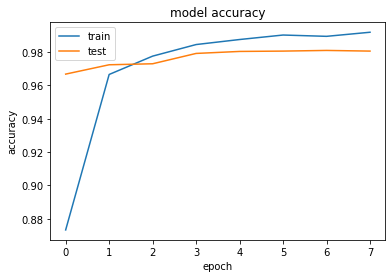

In [111]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [112]:
model.evaluate(xtr,ytr)

60000/60000 [==============================] - 13s 215us/sample - loss: 0.0173 - accuracy: 0.9953


[0.017282974743268762, 0.9953]

In [113]:
score = model.evaluate(xte,yte)

10000/10000 [==============================] - 1s 147us/sample - loss: 0.0843 - accuracy: 0.9801


In [114]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08426947708661318
Test accuracy: 0.9801
